In [70]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 24 10:47:46 2018

@author: Kevin D'Cruz
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import sys
import argparse
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import pandas as pd
import urllib
import cv2

from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.applications.vgg19 import VGG19, preprocess_input

In [71]:

#------------Model Loading---------------------------------
model = ResNet50(weights='imagenet')
target_size = (224, 224)
#model.summary()



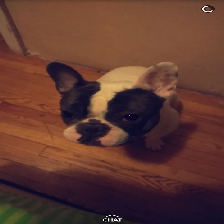

In [91]:
#Local Image path

img_path = "C:/Users/Kevin D'Cruz/Desktop/Haru.jpg"
img = image.load_img(img_path, target_size=(224, 224))


img

Enter a JPG or PNG URL: http://scripting.com/images/2010/09/23/phone.jpg


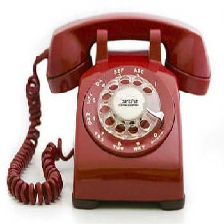

In [92]:
#def image_url(url):
url = input('Enter a JPG or PNG URL: ')
#url = "https://image.freepik.com/free-photo/hrc-siberian-tiger-2-jpg_21253111.jpg"
url_response = urllib.request.urlopen(url) #extract the contents of the URL
image_url=image.load_img(url_response, target_size=(224,224))#img = image.load_img(img, target_size=(224, 224))
image_url
#url_response = urllib.request.urlopen(load) #extract the contents of the URL
#img_array = np.array(bytearray(url_response.read()), dtype=np.uint8) #convert it into a numpy array
#img_array

In [101]:
#Prediction function local image
def predict(model, img, target_size, top_n=5):
 
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)  
  return decode_predictions(preds, top=top_n)[0]
 

In [102]:
#Prediction function: URL
def predict(model, image_url, target_size, top_n=5):

  x = image.img_to_array(image_url)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)  
  return decode_predictions(preds, top=top_n)[0]
 





This picture has the highest possibility of a French_bulldog


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


,a,b,c
0,n02108915,French_bulldog,0.665968
1,n02123597,Siamese_cat,0.279664
2,n02085620,Chihuahua,0.018828
3,n02113186,Cardigan,0.012490
4,n02096585,Boston_bull,0.007347


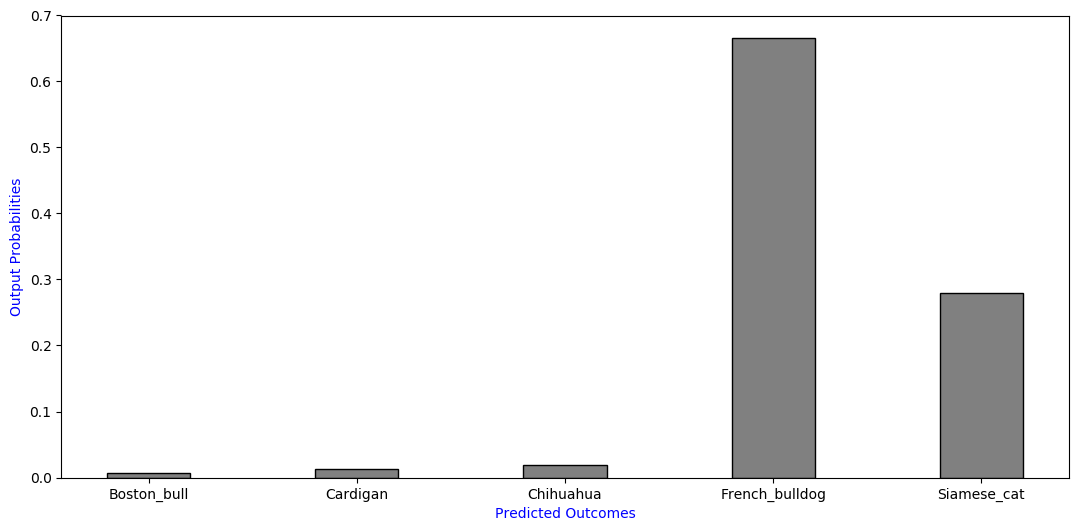

In [105]:
#Plotting: Local Image
prediction = predict(model, img, target_size)
prediction=pd.DataFrame(np.array(prediction).reshape(5,3), columns = list("abc"))
print("This picture has the highest possibility of a "+'\033[1m' '\033[4m'+prediction.b[0])
graph=prediction.convert_objects(convert_numeric=True)

display(graph)

plt.bar(graph.b, graph.c, align='center', color='gray', edgecolor='black', width=0.4)
plt.rcParams['figure.figsize'] = 13,6
plt.xlabel("Predicted Outcomes", color='blue')
plt.ylabel("Output Probabilities", color='blue')
plt.show()

#plt.show()

This picture has the highest possibility of a dial_telephone


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


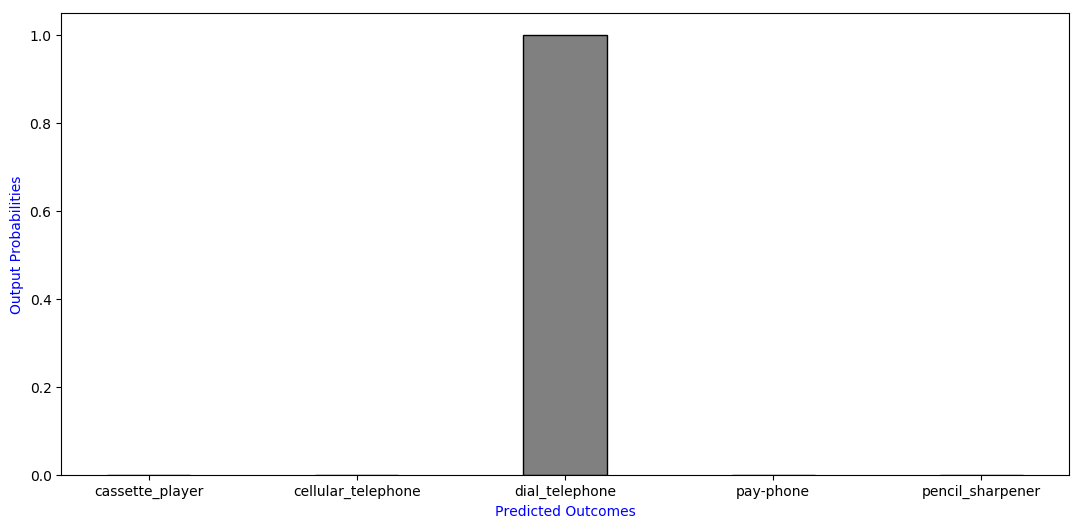

In [104]:
#Plotting: URL
prediction = predict(model, image_url, target_size)
prediction=pd.DataFrame(np.array(prediction).reshape(5,3), columns = list("abc"))
print("This picture has the highest possibility of a "+'\033[1m' '\033[4m'+prediction.b[0])
graph=prediction.convert_objects(convert_numeric=True)

plt.bar(graph.b, graph.c, align='center', color='gray', edgecolor='black', width=0.4)
plt.rcParams['figure.figsize'] = 13,6
plt.xlabel("Predicted Outcomes", color='blue')
plt.ylabel("Output Probabilities", color='blue')
plt.show()

#plt.show()